# Kevin Magnussen

### Team: Haas F1 Team

<img src ="https://www.formula1.com/content/fom-website/en/drivers/mick-schumacher/_jcr_content/helmet.img.png/1617101189118.png" width="200">

In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

mag_laps <- lap_data %>%
            filter(driverId == 825)

# Filtering Lap Data for HAAS
haas_lap <- lap_data %>%
             filter(driverId %in% c(154, 821, 853))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
990,57
949,56
1011,56
1045,56
971,8


`geom_smooth()` using formula 'y ~ x'



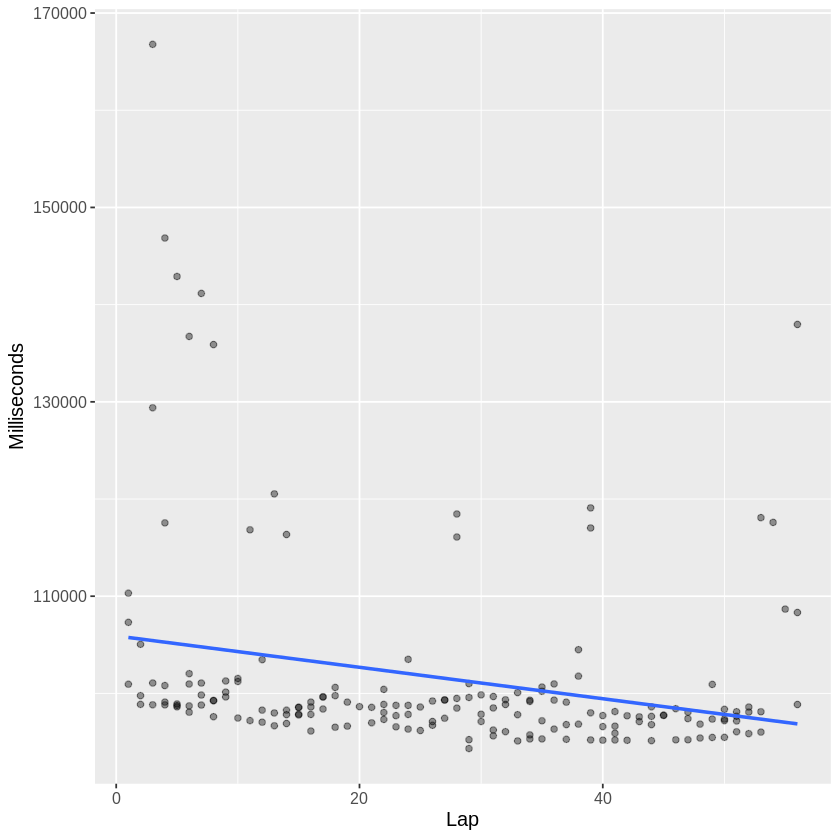

In [5]:
set.seed(2022)

#1. Bahrain 

km_bahrain <- mag_laps %>%
                filter(raceId %in% bahrain_race_ID) 

km_bahrain_clean <- km_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
km_bahrain_clean
km_bahrain_clean_ID <- km_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_bahrain_races <- mag_laps %>%
                    filter(raceId %in% km_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,65


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



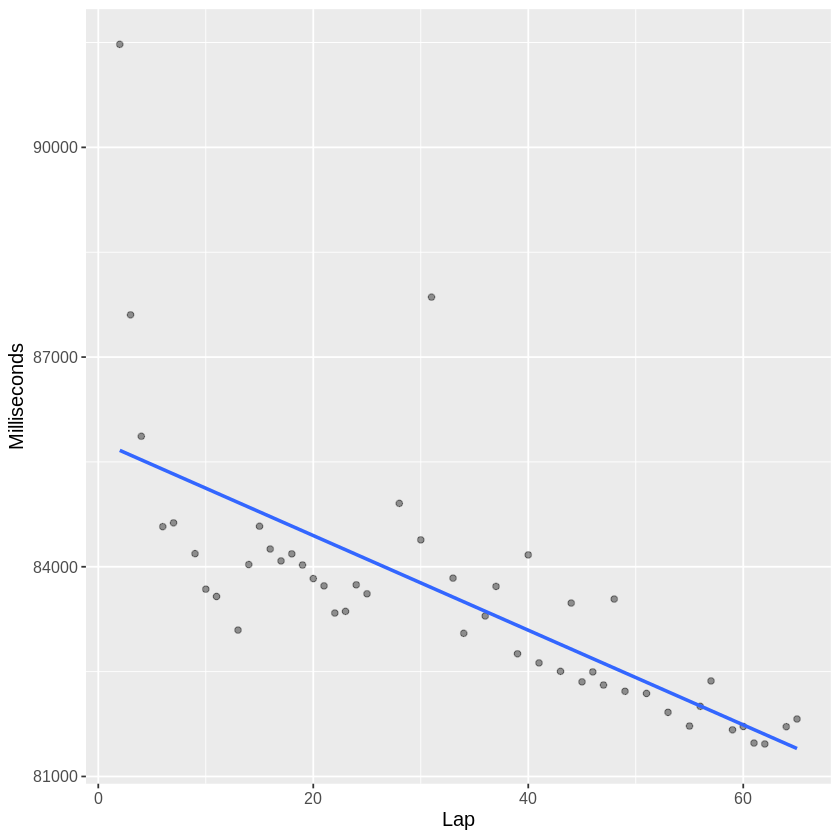

In [6]:
set.seed(2022)

#2. Portimão

km_Portimão <- mag_laps %>%
                filter(raceId %in% Portimão_race_ID) 

km_Portimão_kmean <- km_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_Portimão_kmean
km_Portimão_kmean_ID <- km_Portimão_kmean %>%
                        pull(raceId)


### SPLITTING DATA

km_Portimão_races <- mag_laps %>%
                    filter(raceId %in% km_Portimão_kmean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REkmESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,58
948,57
969,46
989,22


`geom_smooth()` using formula 'y ~ x'



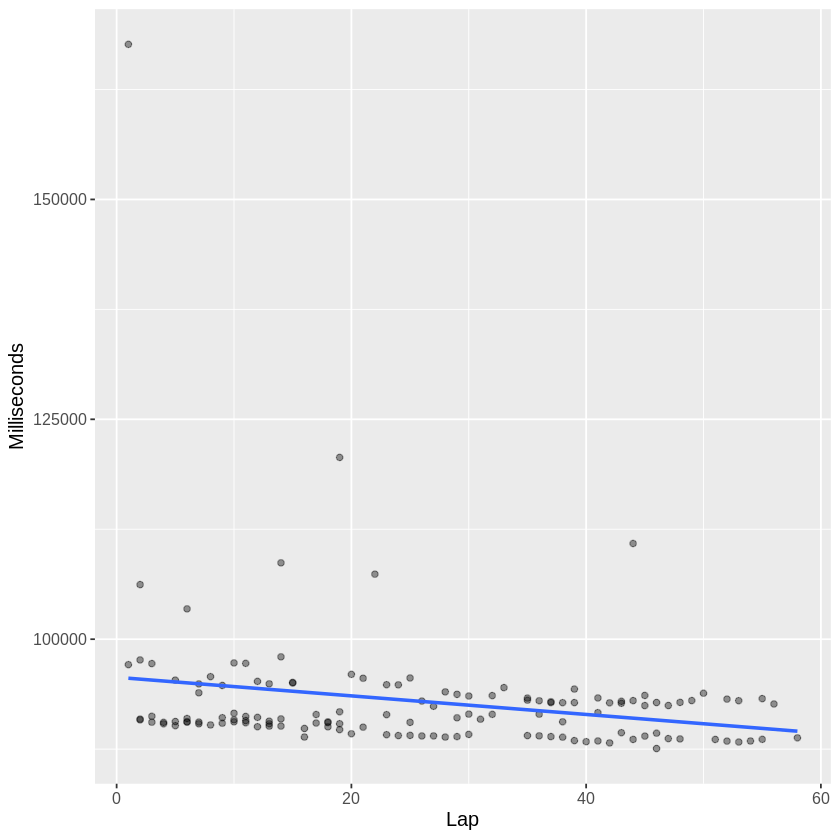

In [7]:
set.seed(2022)

#3.  Australia

km_aus <- mag_laps %>%
                filter(raceId %in% aus_race_ID) 

km_aus_clean <- km_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_aus_clean
km_aus_clean_ID <- km_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_aus_races <- mag_laps %>%
                    filter(raceId %in% km_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(km_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,47


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



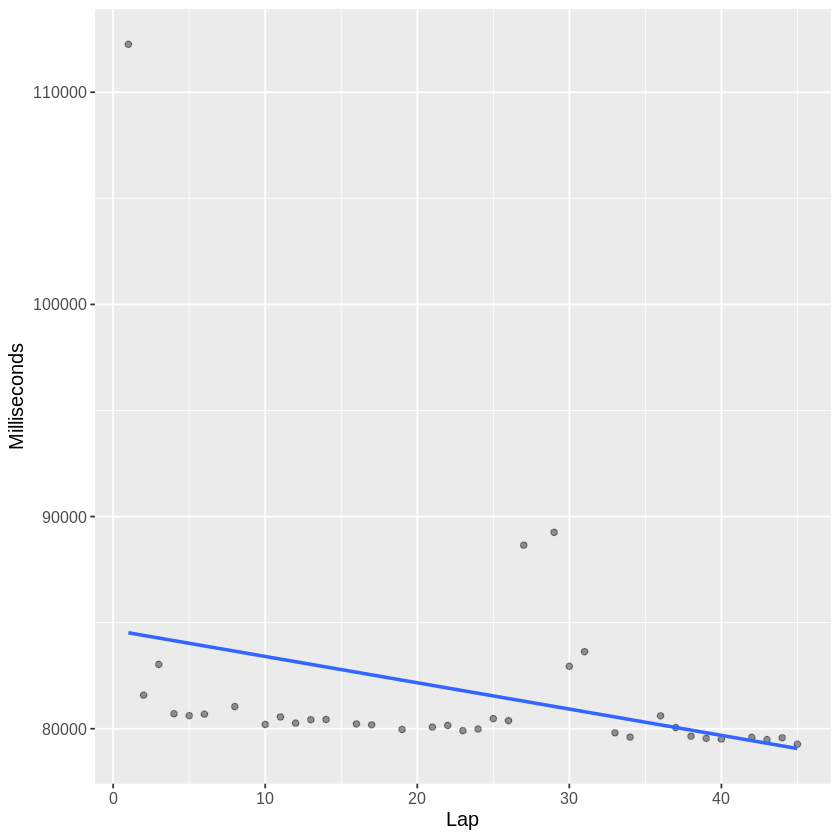

In [8]:
set.seed(2022)

#4.  Italy, Imola

km_imola <- mag_laps %>%
                filter(raceId %in% imola_race_ID) 

km_imola_clean <- km_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_imola_clean
km_imola_clean_ID <- km_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_imola_races <- mag_laps %>%
                    filter(raceId %in% km_imola_clean_ID) 

formulaone_split <- initial_split(km_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,56
1044,49


`geom_smooth()` using formula 'y ~ x'



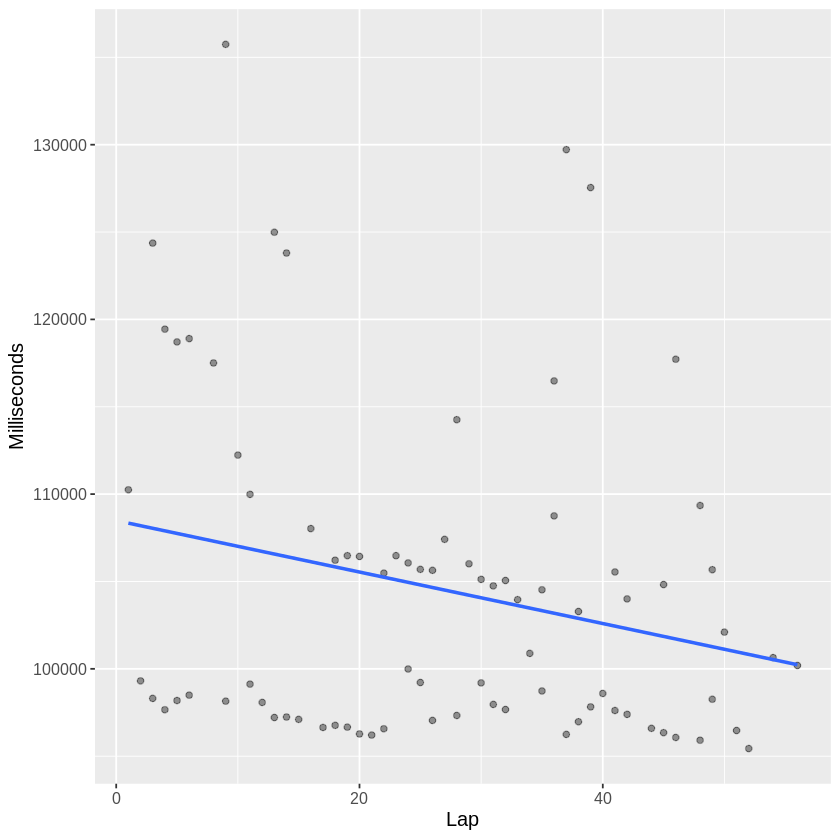

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

km_turkey <- haas_lap %>%
                filter(raceId %in% turkey_race_ID) 

km_turkey_clean <- km_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_turkey_clean
km_turkey_clean_ID <- km_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_turkey_races <- haas_lap %>%
                    filter(raceId %in% km_turkey_clean_ID)

formulaone_split <- initial_split(km_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,66
952,65
993,65
1036,65
973,64


`geom_smooth()` using formula 'y ~ x'



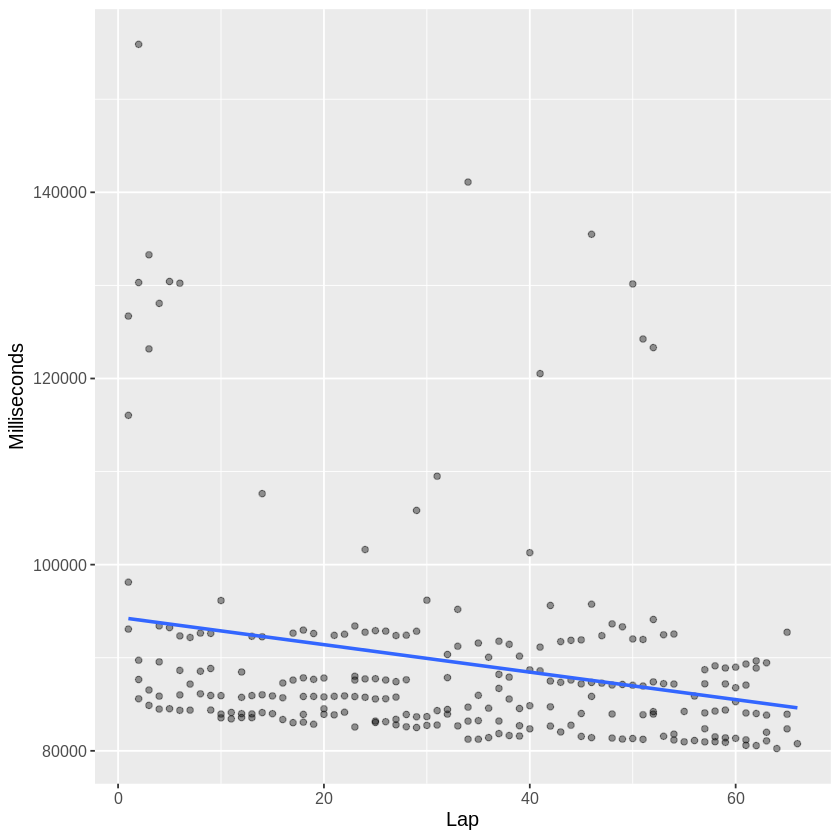

In [10]:
set.seed(2022)

#6. Spain

km_spain <- mag_laps %>%
                filter(raceId %in% spain_race_ID) 

km_spain_clean <- km_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_spain_clean
km_spain_clean_ID <- km_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_spain_races <- mag_laps %>%
                    filter(raceId %in% km_spain_clean_ID)

formulaone_split <- initial_split(km_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
974,78
994,78
1015,77
953,32


`geom_smooth()` using formula 'y ~ x'



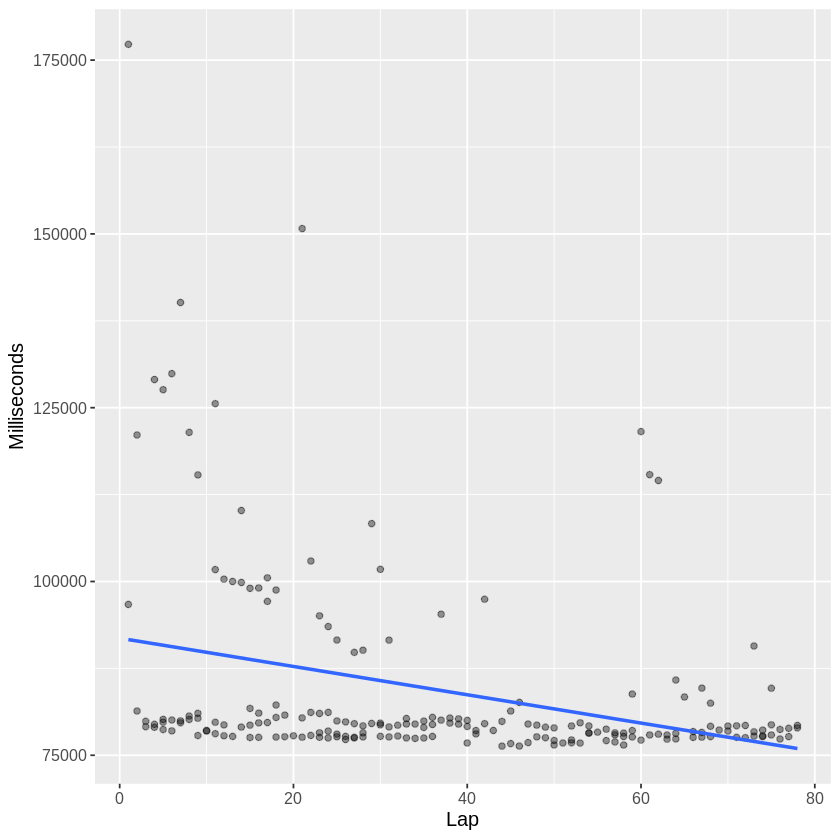

In [11]:
set.seed(2022)

#7.   Monaco

km_monaco <- mag_laps %>%
                filter(raceId %in% monaco_race_ID) 

km_monaco_clean <- km_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_monaco_clean
km_monaco_clean_ID <- km_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_monaco_races <- mag_laps %>%
                    filter(raceId %in% km_monaco_clean_ID)

formulaone_split <- initial_split(km_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
992,51
955,50
1013,50


`geom_smooth()` using formula 'y ~ x'



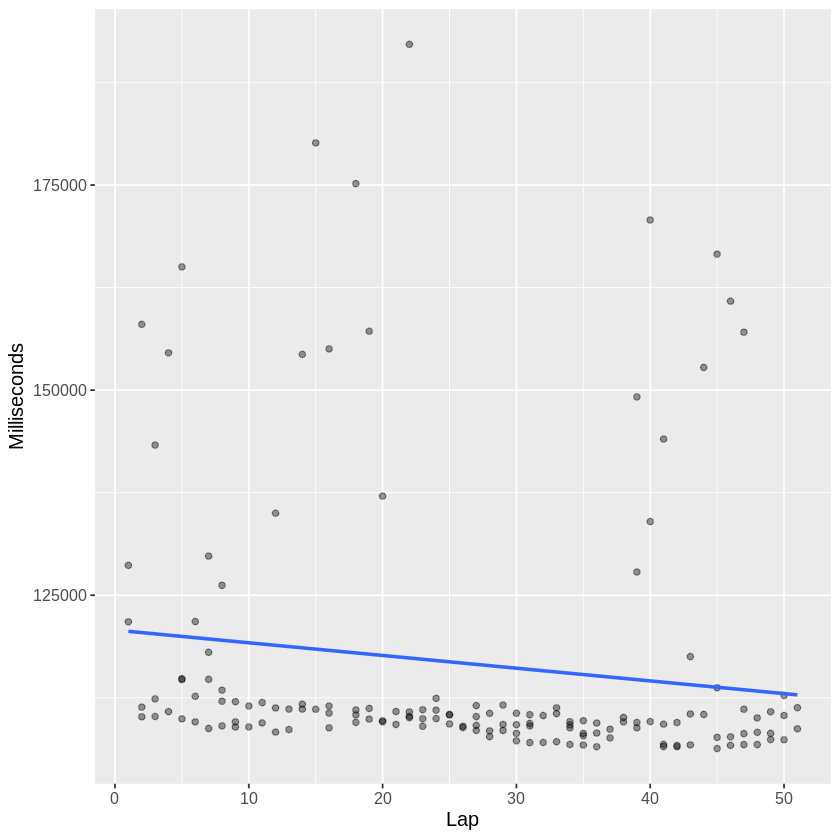

In [12]:
set.seed(2022)

#8.  Azerbaijan

km_azerbaijan <- mag_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

km_azerbaijan_clean <- km_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_azerbaijan_clean
km_azerbaijan_clean_ID <- km_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_azerbaijan_races <- mag_laps %>%
                    filter(raceId %in% km_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
975,69
954,68
1016,68
995,67


`geom_smooth()` using formula 'y ~ x'



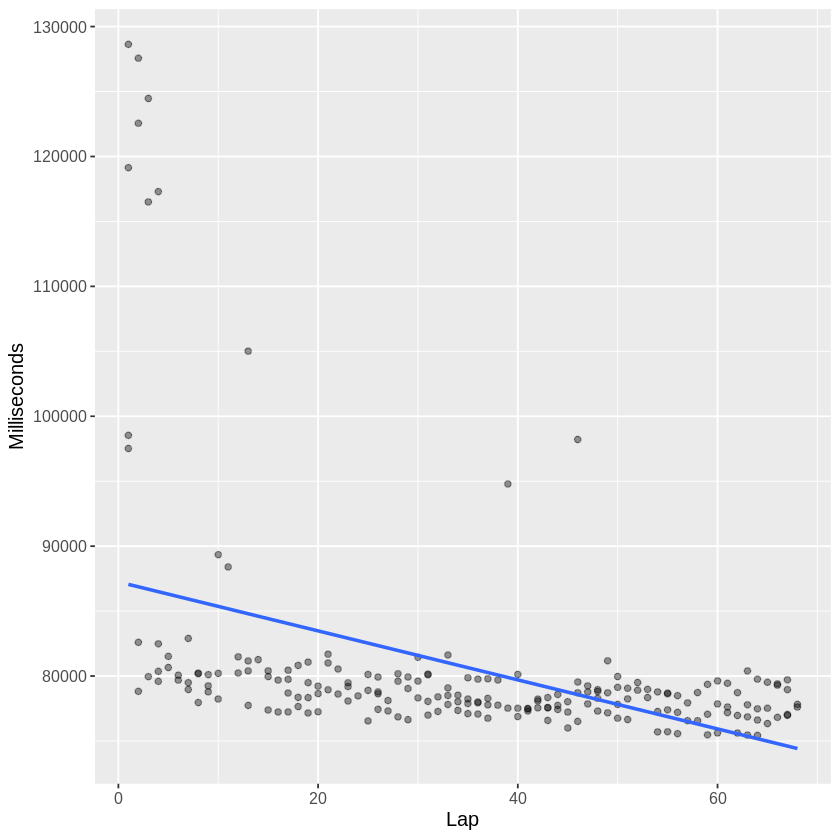

In [13]:
set.seed(2022)

#9.  Canada

km_canada <- mag_laps %>%
                filter(raceId %in% canada_race_ID) 

km_canada_clean <- km_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_canada_clean
km_canada_clean_ID <- km_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_canada_races <- mag_laps %>%
                    filter(raceId %in% km_canada_clean_ID)

formulaone_split <- initial_split(km_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



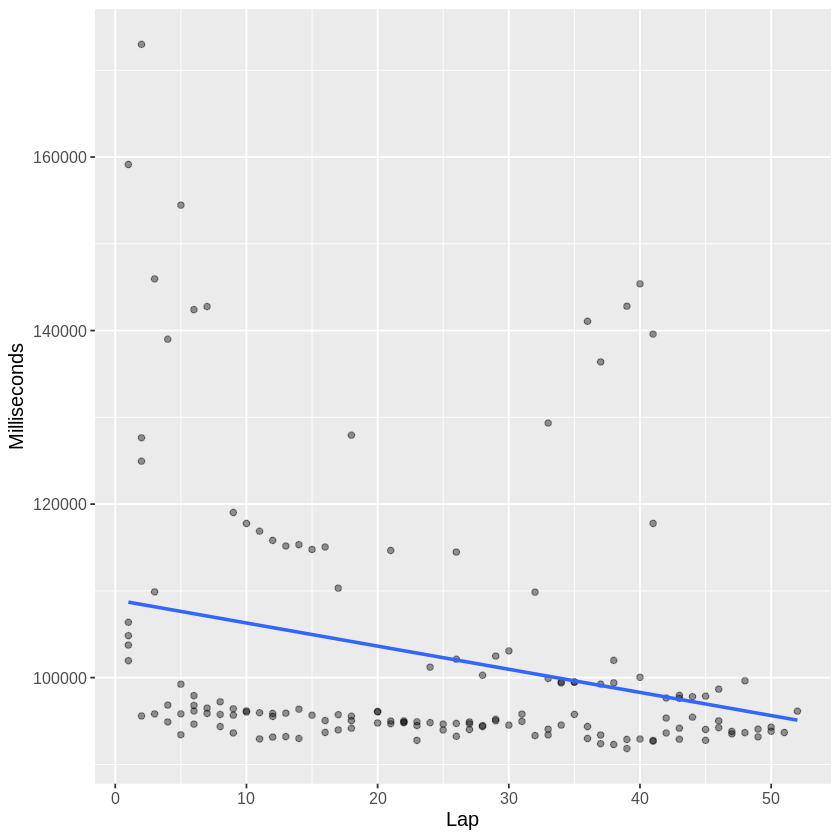

In [14]:
set.seed(2022)

#10.  Great Britain

km_uk <- mag_laps %>%
                filter(raceId %in% uk_race_ID) 

km_uk_clean <- km_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_uk_clean_ID <- km_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_uk_races <- mag_laps %>%
                    filter(raceId %in% km_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(km_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



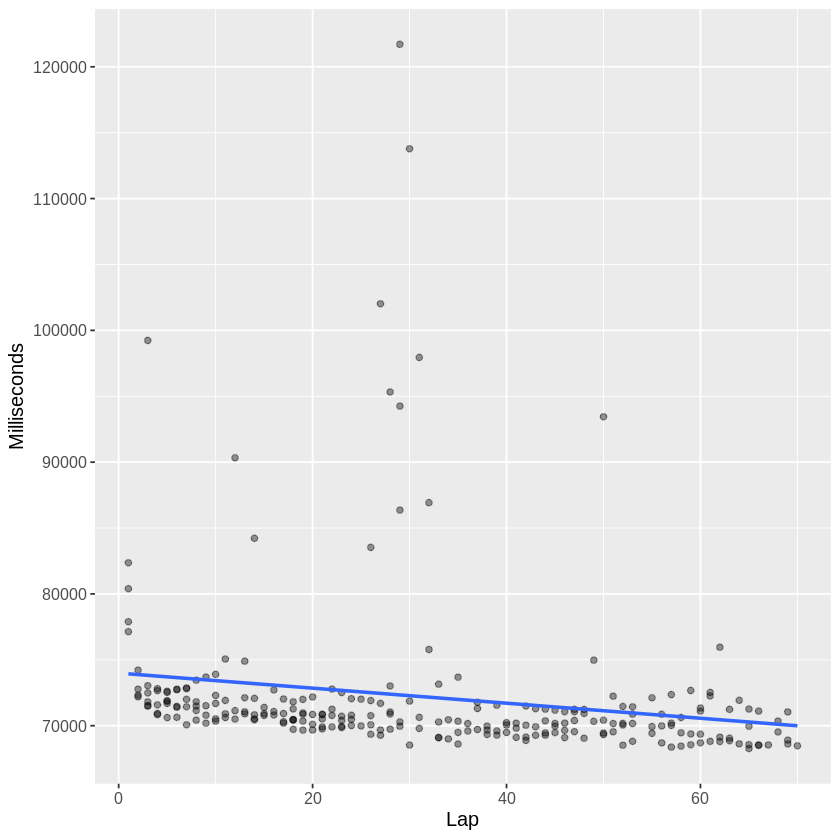

In [15]:
set.seed(2022)

#11.  Austria

km_austria <- mag_laps %>%
                filter(raceId %in% austria_race_ID) 

km_austria_clean <- km_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_austria_clean_ID <- km_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_austria_races <- mag_laps %>%
                    filter(raceId %in% km_austria_clean_ID) 

formulaone_split <- initial_split(km_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,53
1017,52


`geom_smooth()` using formula 'y ~ x'



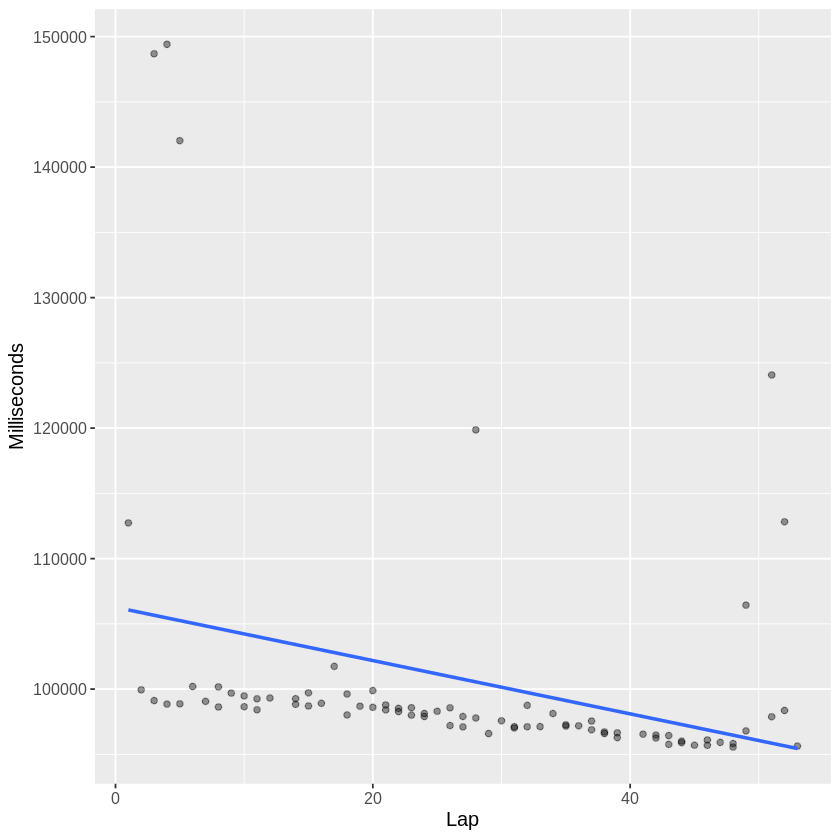

In [16]:
set.seed(2022)

#12.  France

km_france <- mag_laps %>%
                filter(raceId %in% france_race_ID) 

km_france_clean <- km_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_france_clean
km_france_clean_ID <- km_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_france_races <- mag_laps %>%
                    filter(raceId %in% km_france_clean_ID)

formulaone_split <- initial_split(km_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



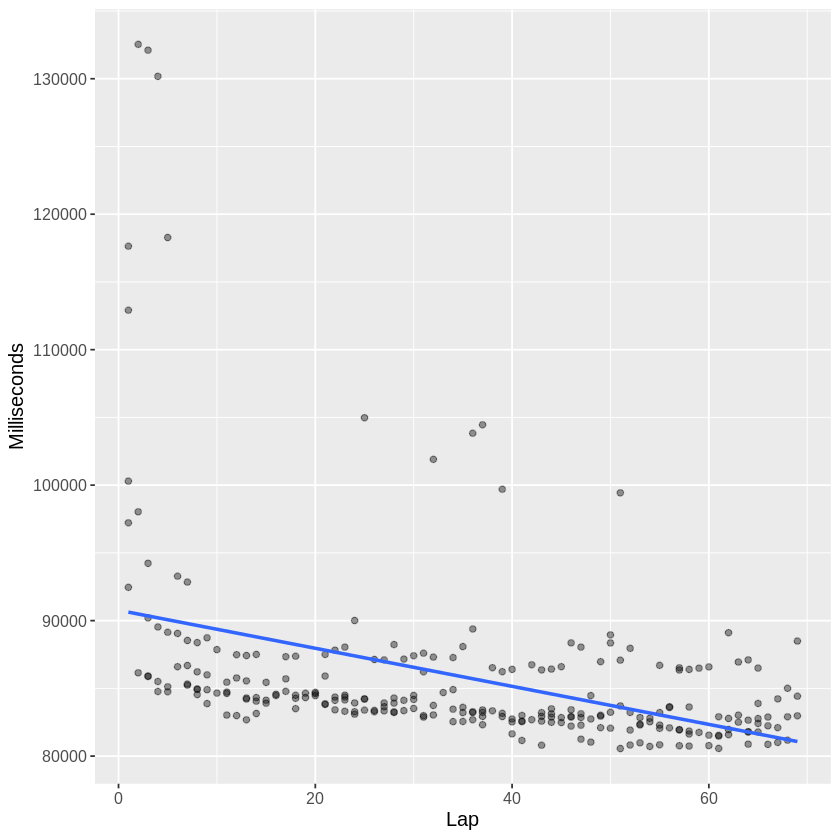

In [17]:
set.seed(2022)

#13.  Hungary

km_hungary <- mag_laps %>%
                filter(raceId %in% hungary_race_ID) 

km_hungary_clean <- km_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

km_hungary_clean_ID <- km_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_hungary_races <- mag_laps %>%
                    filter(raceId %in% km_hungary_clean_ID)

formulaone_split <- initial_split(km_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
980,44
1001,44
1037,44
1022,43
960,5


`geom_smooth()` using formula 'y ~ x'



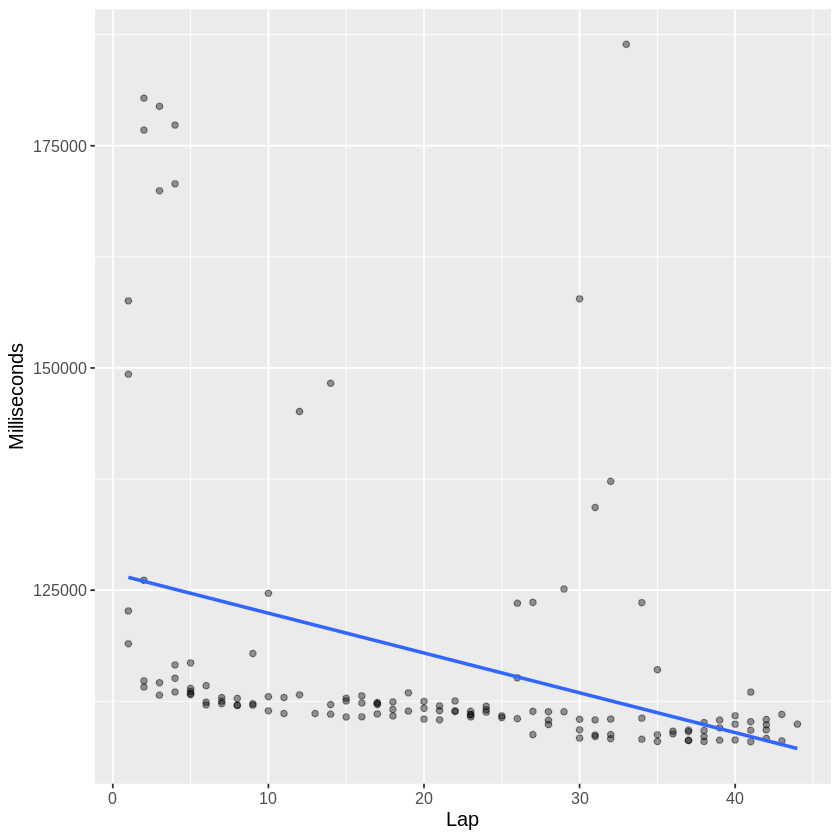

In [18]:
set.seed(2022)

#14.  Belgium

km_belgium <- mag_laps %>%
                filter(raceId %in% belgium_race_ID) 

km_belgium_clean <- km_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_belgium_clean
km_belgium_clean_ID <- km_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_belgium_races <- mag_laps %>%
                    filter(raceId %in% km_belgium_clean_ID)

formulaone_split <- initial_split(km_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,41


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



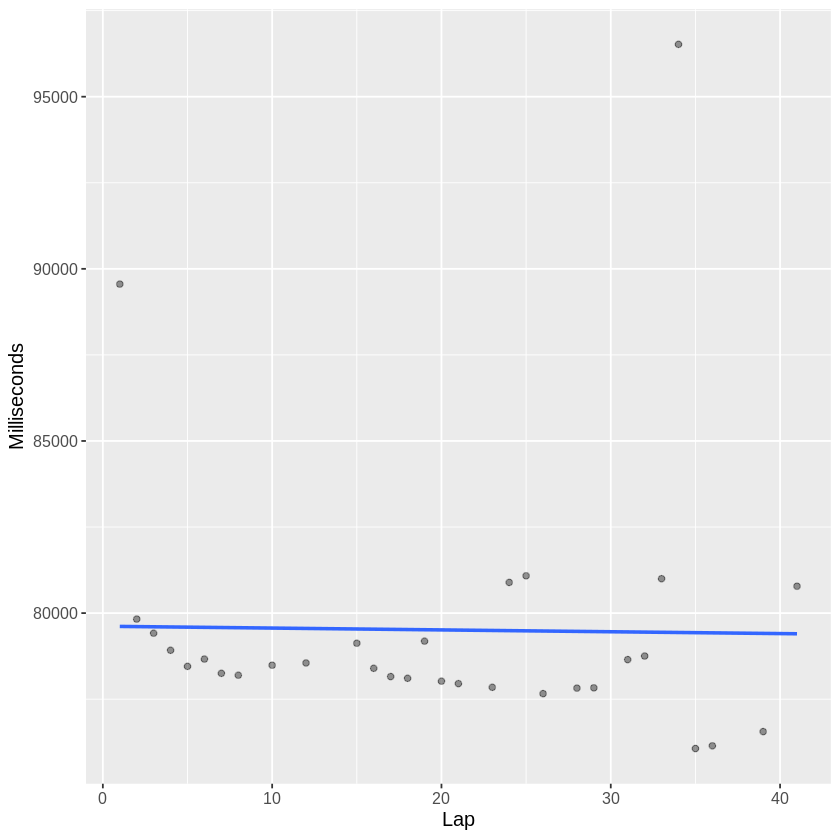

In [19]:
set.seed(2022)

#15.  Netherlands

km_netherlands <- haas_lap %>%
                filter(raceId %in% netherlands_race_ID) 

km_netherlands_clean <- km_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_netherlands_clean
km_netherlands_clean_ID <- km_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_netherlands_races <- haas_lap %>%
                    filter(raceId %in% km_netherlands_clean_ID)

formulaone_split <- initial_split(km_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

## GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
961,52
981,52
1002,52
1023,43
1038,17


`geom_smooth()` using formula 'y ~ x'



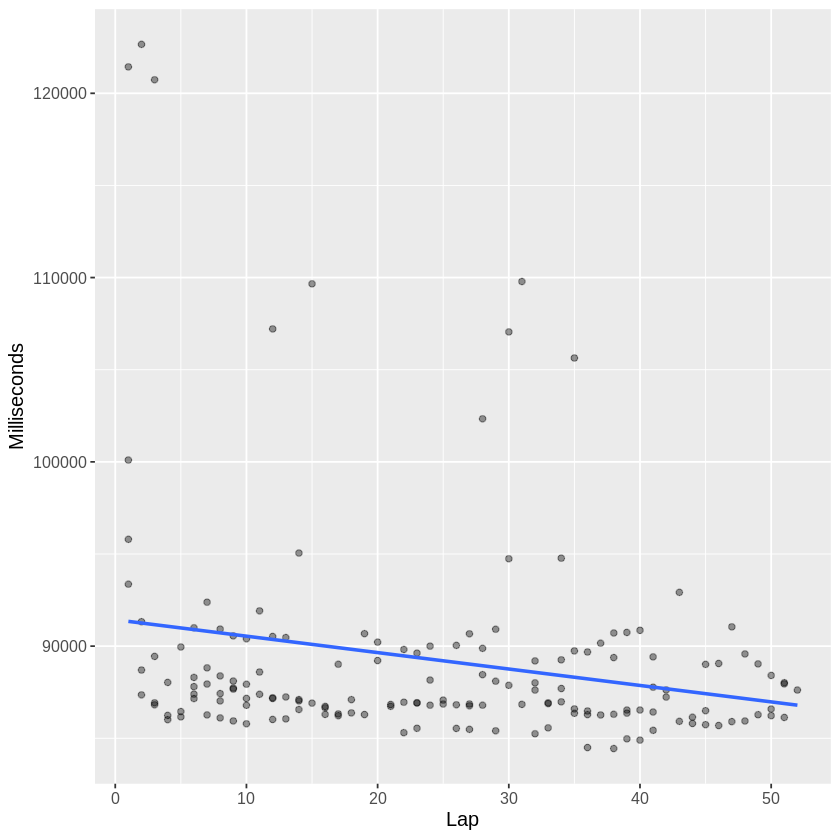

In [20]:
set.seed(2022)

#16.  Italy, Monza

km_monza <- mag_laps %>%
                filter(raceId %in% monza_race_ID) 

km_monza_clean <- km_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
km_monza_clean
km_monza_clean_ID <- km_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_monza_races <- mag_laps %>%
                    filter(raceId %in% km_monza_clean_ID)

formulaone_split <- initial_split(km_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



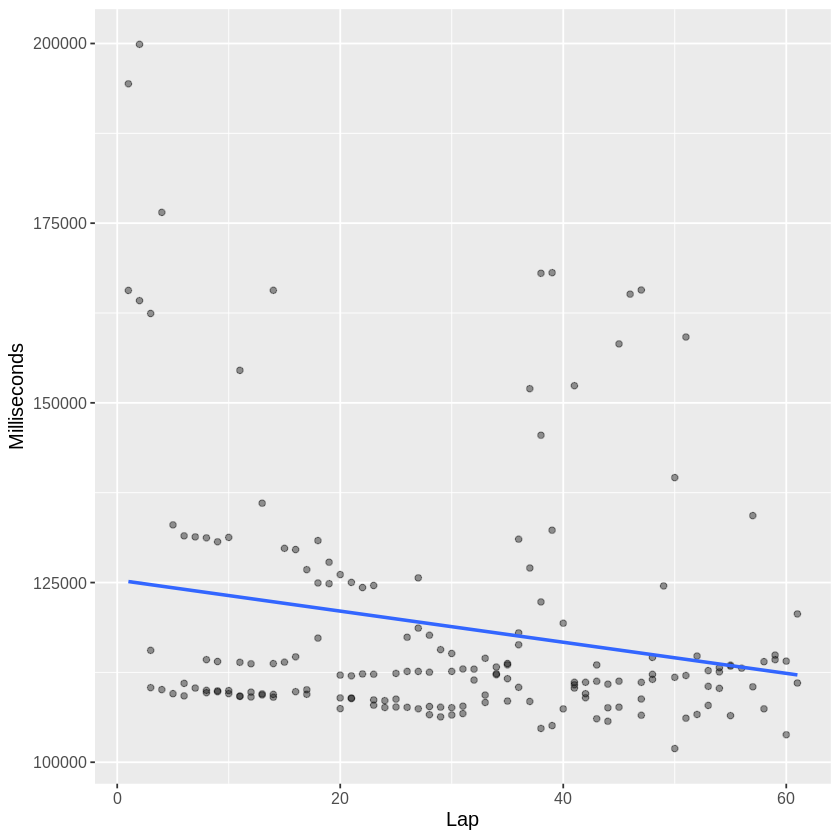

In [21]:
set.seed(2022)

#17.  Singapore

km_singapore <- mag_laps %>%
                filter(raceId %in% singapore_race_ID) 

km_singapore_clean <- km_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_singapore_clean_ID <- km_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_singapore_races <- mag_laps %>%
                    filter(raceId %in% km_singapore_clean_ID)

formulaone_split <- initial_split(km_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



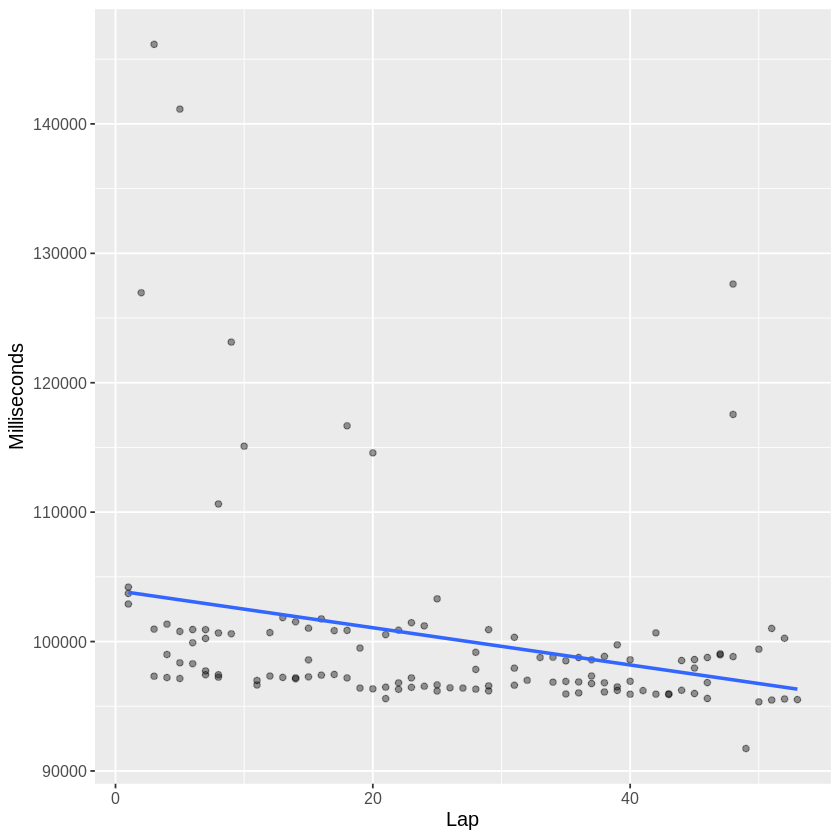

In [22]:
set.seed(2022)

#18. Japan

km_japan <- mag_laps %>%
                filter(raceId %in% japan_race_ID) 

km_japan_clean <- km_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_japan_clean_ID <- km_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_japan_races <- mag_laps %>%
                    filter(raceId %in% km_japan_clean_ID) 

formulaone_split <- initial_split(km_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



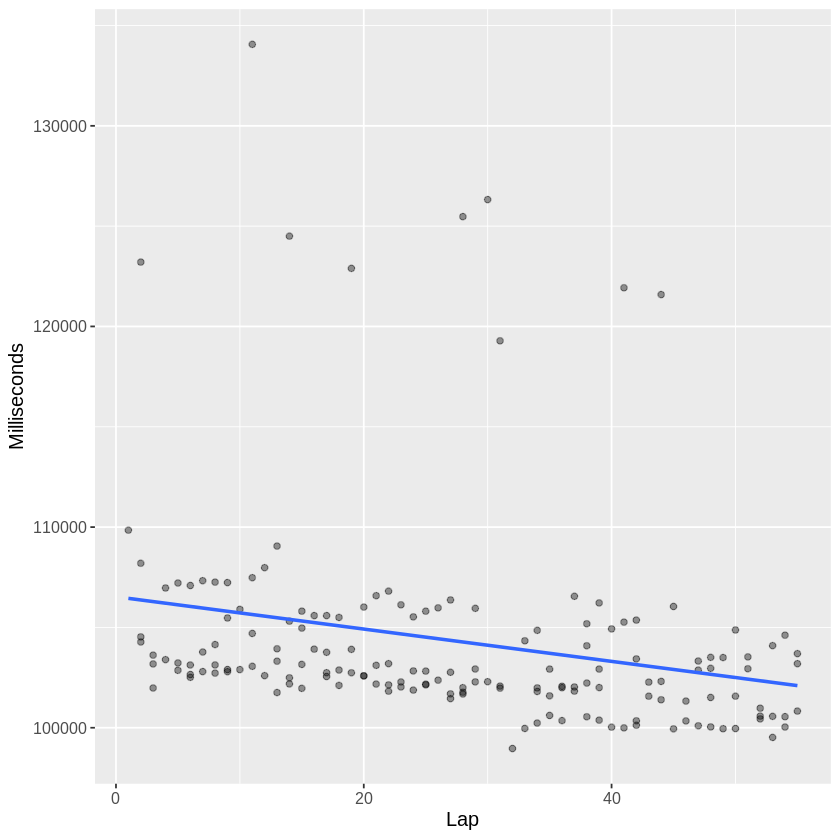

In [23]:
set.seed(2022)

#19. USA, Austin

km_austin <- mag_laps %>%
                filter(raceId %in% austin_race_ID) 

km_austin_clean <- km_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_austin_clean_ID <- km_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_austin_races <- mag_laps %>%
                    filter(raceId %in% km_austin_clean_ID)

formulaone_split <- initial_split(km_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



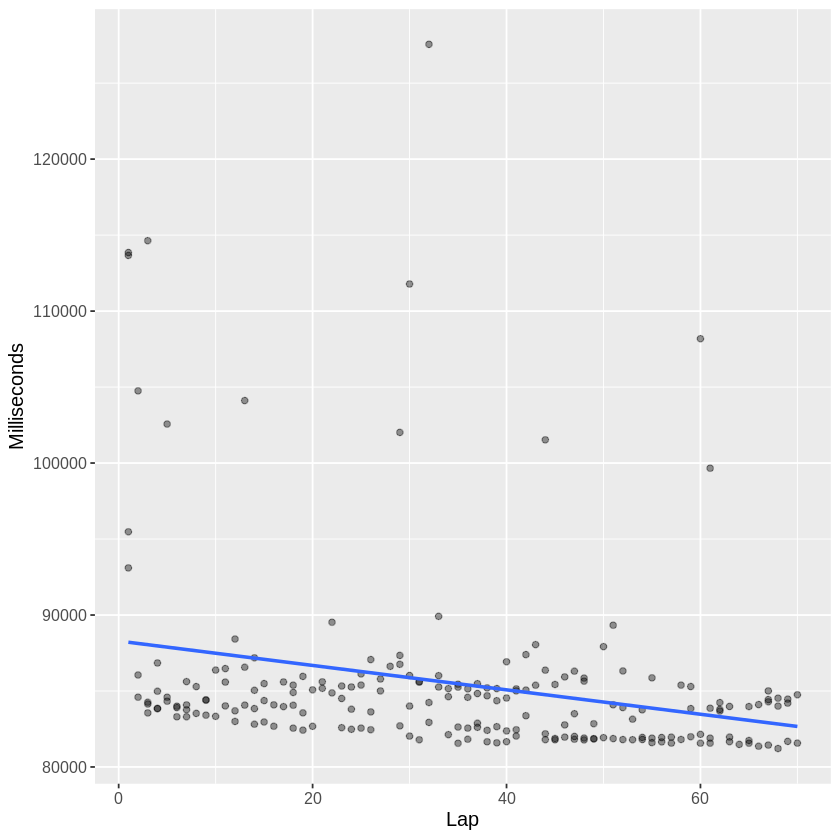

In [24]:
set.seed(2022)

#20. Mexico

km_mexico <- mag_laps %>%
                filter(raceId %in% mexico_race_ID) 

km_mexico_clean <- km_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_mexico_clean_ID <- km_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_mexico_races <- mag_laps %>%
                    filter(raceId %in% km_mexico_clean_ID)

formulaone_split <- initial_split(km_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



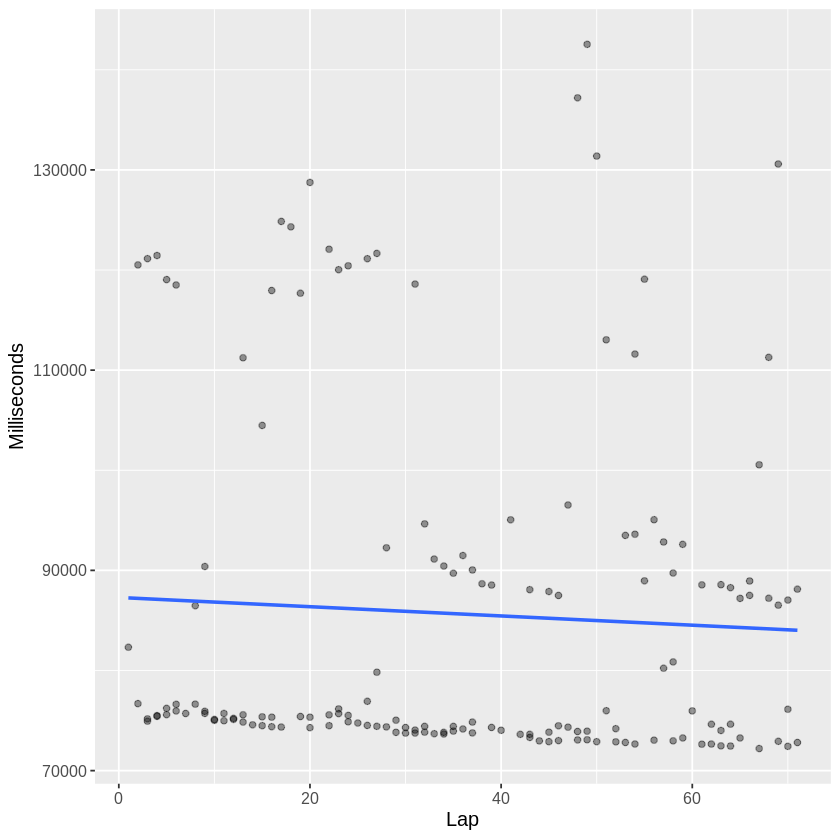

In [25]:
set.seed(2022)

#21. Brazil

km_brazil <- mag_laps %>%
                filter(raceId %in% brazil_race_ID) 

km_brazil_clean <- km_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

km_brazil_clean_ID <- km_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_brazil_races <- mag_laps %>%
                    filter(raceId %in% km_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(km_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
988,54
1009,54
1030,54
1047,54
968,5


`geom_smooth()` using formula 'y ~ x'



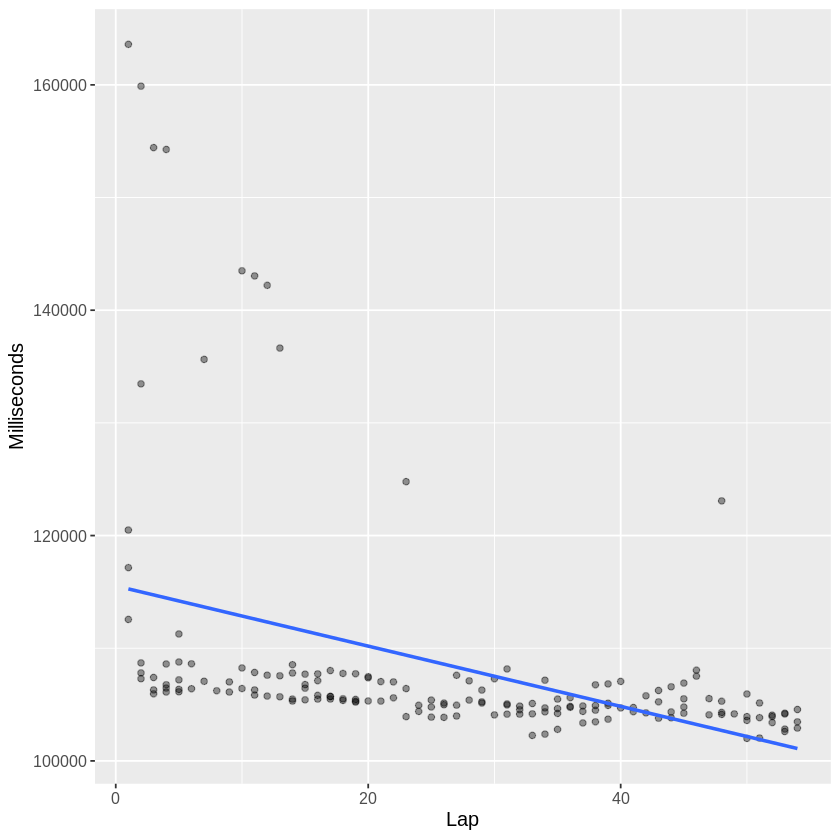

In [26]:
set.seed(2022)

#22. Abu Dhabi

km_uae <- mag_laps %>%
                filter(raceId %in% uae_race_ID) 

km_uae_clean <- km_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
km_uae_clean
km_uae_clean_ID <- km_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

km_uae_races <- mag_laps %>%
                    filter(raceId %in% km_uae_clean_ID)

formulaone_split <- initial_split(km_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

km_merge <- merge(rmse_col, racetime_col)

km_merge

write_csv(km_merge, "final_race_data/km_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,12660.964,1
rmse,standard,4433.216,2
rmse,standard,14467.297,3
rmse,standard,7670.133,4
rmse,standard,10019.171,5
rmse,standard,8569.604,6
rmse,standard,12363.503,7
rmse,standard,19252.440,8
rmse,standard,5284.497,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5769986,96.16643,1.602774,1
5513130,91.88550,1.531425,2
5368066,89.46777,1.491129,3
5082756,84.71260,1.411877,4
5940136,99.00227,1.650038,5
5901376,98.35627,1.639271,6
6536707,108.94511,1.815752,7
5952955,99.21592,1.653599,8
5638489,93.97481,1.566247,9


Round,.metric,.estimator,.estimate,race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rmse,standard,12660.964,5769986,96.16643,1.602774
2,rmse,standard,4433.216,5513130,91.88550,1.531425
3,rmse,standard,14467.297,5368066,89.46777,1.491129
4,rmse,standard,7670.133,5082756,84.71260,1.411877
5,rmse,standard,10019.171,5940136,99.00227,1.650038
6,rmse,standard,8569.604,5901376,98.35627,1.639271
7,rmse,standard,12363.503,6536707,108.94511,1.815752
8,rmse,standard,19252.440,5952955,99.21592,1.653599
9,rmse,standard,5284.497,5638489,93.97481,1.566247
